# **Face Detection**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/Projects/Face_recoginization/Indian_Actors_images.zip

Streaming output truncated to the last 5000 lines.
  inflating: Bollywood Actor Images/Bollywood Actor Images/govinda/055956d330.jpg  
  inflating: Bollywood Actor Images/Bollywood Actor Images/govinda/0996136e8c.jpg  
  inflating: Bollywood Actor Images/Bollywood Actor Images/govinda/0da66bb466.jpg  
  inflating: Bollywood Actor Images/Bollywood Actor Images/govinda/0fe492a8e8.jpg  
  inflating: Bollywood Actor Images/Bollywood Actor Images/govinda/10c27a4ed7.jpg  
  inflating: Bollywood Actor Images/Bollywood Actor Images/govinda/169bdb8a71.jpg  
  inflating: Bollywood Actor Images/Bollywood Actor Images/govinda/1cef10d37a.jpg  
  inflating: Bollywood Actor Images/Bollywood Actor Images/govinda/20721b7931.jpg  
  inflating: Bollywood Actor Images/Bollywood Actor Images/govinda/22bfcf5465.jpg  
  inflating: Bollywood Actor Images/Bollywood Actor Images/govinda/2406e4d2f7.jpg  
  inflating: Bollywood Actor Images/Bollywood Actor Images/govinda/24e6904bd3.jpg  
  inflating: Bollywood Ac

In [3]:
!unzip /content/drive/MyDrive/Projects/Face_recoginization/bollywood_celeb_faces.zip

Streaming output truncated to the last 5000 lines.
  inflating: bollywood_celeb_faces/bollywood_celeb_faces_0/Karisma_Kapoor/Karisma_Kapoor.126.jpg  
  inflating: bollywood_celeb_faces/bollywood_celeb_faces_0/Karisma_Kapoor/Karisma_Kapoor.130.jpg  
  inflating: bollywood_celeb_faces/bollywood_celeb_faces_0/Karisma_Kapoor/Karisma_Kapoor.133.jpg  
  inflating: bollywood_celeb_faces/bollywood_celeb_faces_0/Karisma_Kapoor/Karisma_Kapoor.136.jpg  
  inflating: bollywood_celeb_faces/bollywood_celeb_faces_0/Karisma_Kapoor/Karisma_Kapoor.138.jpg  
  inflating: bollywood_celeb_faces/bollywood_celeb_faces_0/Karisma_Kapoor/Karisma_Kapoor.139.jpg  
  inflating: bollywood_celeb_faces/bollywood_celeb_faces_0/Karisma_Kapoor/Karisma_Kapoor.142.jpg  
  inflating: bollywood_celeb_faces/bollywood_celeb_faces_0/Karisma_Kapoor/Karisma_Kapoor.143.jpg  
  inflating: bollywood_celeb_faces/bollywood_celeb_faces_0/Karisma_Kapoor/Karisma_Kapoor.147.jpg  
  inflating: bollywood_celeb_faces/bollywood_celeb_faces_0

In [4]:
!pip install mtcnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 8.5 MB/s eta 0:00:00


In [5]:
import os
import matplotlib.pyplot as plt
from mtcnn import MTCNN
import cv2
import numpy as np

In [6]:
#Checking the Actors
print(os.listdir("/content/Bollywood Actor Images/Bollywood Actor Images"))
len(os.listdir("/content/Bollywood Actor Images/Bollywood Actor Images"))

['tinnu_anand', 'sunny_deol', 'rekha', 'sharman_joshi', 'mukesh_khanna', 'zeenat_aman', 'vinod_khanna', 'jeetendra', 'naseeruddin_shah', 'rajpal_yadav', 'shabana_azmi', 'girish_karnad', 'adil_hussain', 'anil_kapoor', 'priyanka_chopra', 'nandita_das', 'mehmood', 'amjad_khan', 'mohanlal', 'sharmila_tagore', 'farhan_akhtar', 'waheeda_rehman', 'nargis', 'anushka_shetty', 'randeep_hooda', 'kulbhushan_kharbanda', 'konkona_sen_sharma', 'amol_palekar', 'mohnish_bahl', 'darsheel_safary', 'dimple_kapadia', 'jimmy_sheirgill', 'rani_mukerji', 'asrani', 'rajinikanth', 'ajay_devgn', 'ashish_vidyarthi', 'deepika_padukone', 'pooja_bhatt', 'amole_gupte', 'rajkummar_rao', 'rishi_kapoor', 'tabu', 'salman_khan', 'navin_nischol', 'akshaye_khanna', 'irrfan_khan', 'hrithik_roshan', 'dilip_kumar', 'chunky_panday', 'mukul_dev', 'pankaj_tripathi', 'kader_khan', 'sanjay_dutt', 'raj_babbar', 'radhika_apte', 'mithun_chakraborty', 'pawan_malhotra', 'ranvir_shorey', 'prakash_raj', 'ranveer_singh', 'rahul_bose', 'rak

135

In [7]:
#Calculating the number of images for each actor
actors=os.listdir("/content/Bollywood Actor Images/Bollywood Actor Images")
for actor in actors:
  images_folder_path='/content/Bollywood Actor Images/Bollywood Actor Images/'+actor
  no_images=len(os.listdir(images_folder_path))
  print(actor,' : ',no_images,end='')
  print('\n')

tinnu_anand  :  50

sunny_deol  :  50

rekha  :  50

sharman_joshi  :  50

mukesh_khanna  :  50

zeenat_aman  :  50

vinod_khanna  :  50

jeetendra  :  50

naseeruddin_shah  :  50

rajpal_yadav  :  50

shabana_azmi  :  50

girish_karnad  :  50

adil_hussain  :  50

anil_kapoor  :  50

priyanka_chopra  :  50

nandita_das  :  50

mehmood  :  50

amjad_khan  :  50

mohanlal  :  50

sharmila_tagore  :  50

farhan_akhtar  :  50

waheeda_rehman  :  50

nargis  :  50

anushka_shetty  :  50

randeep_hooda  :  50

kulbhushan_kharbanda  :  50

konkona_sen_sharma  :  50

amol_palekar  :  50

mohnish_bahl  :  50

darsheel_safary  :  50

dimple_kapadia  :  50

jimmy_sheirgill  :  50

rani_mukerji  :  50

asrani  :  50

rajinikanth  :  50

ajay_devgn  :  50

ashish_vidyarthi  :  50

deepika_padukone  :  50

pooja_bhatt  :  50

amole_gupte  :  50

rajkummar_rao  :  50

rishi_kapoor  :  50

tabu  :  50

salman_khan  :  50

navin_nischol  :  50

akshaye_khanna  :  50

irrfan_khan  :  50

hrithik_roshan

# **Face Detection**

In [8]:
def face_detection(img_path):
  #Image reading and visualization
  image = cv2.imread(img_path)
  image= cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #converting from BGR(Blue green red) to RGB(Red green blue)
  print('The provided image is')
  plt.imshow(image)
  plt.show()

  # loading the MTCNN and detecting faces
  detector = MTCNN()
  faces = detector.detect_faces(image)
  print(faces)

  #Obtaining the rectangle on the image
  for face in faces:
    x, y, w, h = face['box']   #for each face get the bounding coordinates :[x, y, width, height].
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
  print('Detected Face in the image : ')
  plt.imshow(image)
  plt.show()


  if len(faces)==0:             #no face in the image
     return []                 #return empty box


  #else returning the bounding box
  return face['box']


The provided image is


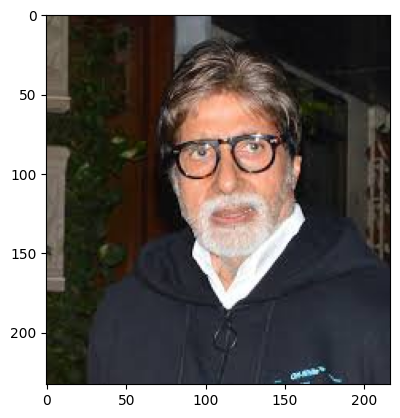

1/1 [==============================] - 0s 181ms/step
[{'box': [80, 49, 74, 101], 'confidence': 0.9983468055725098, 'keypoints': {'left_eye': (96, 87), 'right_eye': (129, 82), 'nose': (114, 107), 'mouth_left': (105, 128), 'mouth_right': (130, 123)}}]
Detected Face in the image : 


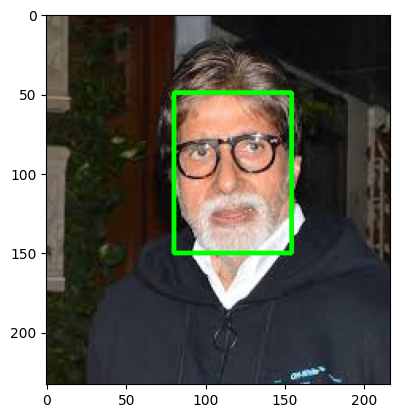

[80, 49, 74, 101]

In [9]:
img_path='/content/Bollywood Actor Images/Bollywood Actor Images/amitabh_bachchan/4e38a7a0e5.jpg'
face_detection(img_path)

The provided image is


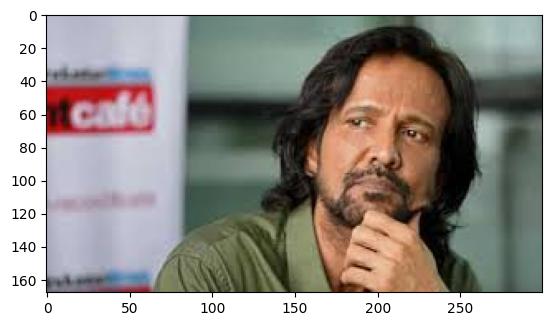

1/1 [==============================] - 0s 110ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 204ms/step
[{'box': [163, 29, 74, 101], 'confidence': 0.999967634677887, 'keypoints': {'left_eye': (188, 65), 'right_eye': (222, 72), 'nose': (205, 87), 'mouth_left': (186, 104), 'mouth_right': (214, 110)}}]
Detected Face in the image : 


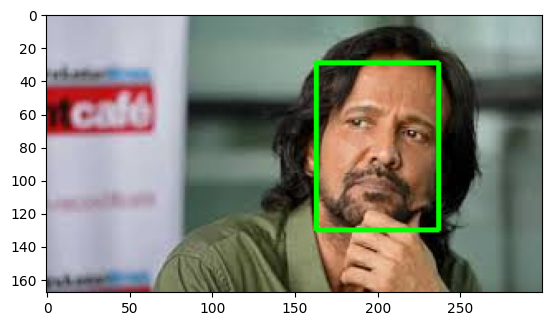

[163, 29, 74, 101]

In [10]:
img_path='/content/Bollywood Actor Images/Bollywood Actor Images/kay_kay_menon/0262f68fe2.jpg'
face_detection(img_path)

Extracting the face from image

In [11]:
def actor_face(img_path):
  #Image reading and visualization
  img=img_path
  img = cv2.imread(img)
  img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  # loading the MTCNN and detecting faces
  detector = MTCNN()
  faces = detector.detect_faces(img)

  #Getting the correct(largest face)
  detected_faces=[]
  for face in faces:
    detected_faces.append(face['box'])

  if len(detected_faces)==0:            #if no face in the image
    face_region=[]
    face_region=np.array(face_region)
    return face_region

  if len(detected_faces) >1:           #more than one face in the image
    largest_box = None
    largest_area = 0

    for face in detected_faces:
        x, y, width, height = face
        area = width * height

        if area > largest_area:
            largest_area = area
            largest_box = face
  else:                                 #only one face in the image
    largest_box=face['box']


  #Extracting the face with help of coordinates
  x, y, width, height = largest_box[0],largest_box[1],largest_box[2],largest_box[3]
  face_region = img[y:y+height, x:x+width]
  print("Extracted Face is : ")
  plt.imshow(face_region)
  plt.show()

  face_region= cv2.cvtColor(face_region, cv2.COLOR_BGR2RGB) #reconverting to BGR because it needs to be saved locally
  return face_region

1/1 [==============================] - 0s 370ms/step
Extracted Face is : 


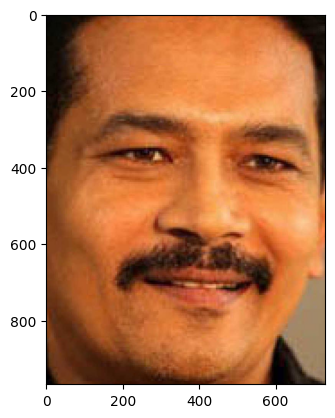

array([[[  8,  10,  10],
        [  8,  10,  10],
        [  8,  10,  10],
        ...,
        [ 25,  32,  35],
        [ 25,  32,  35],
        [ 25,  32,  35]],

       [[  8,  10,  10],
        [  8,  10,  10],
        [  8,  10,  10],
        ...,
        [ 25,  32,  35],
        [ 25,  32,  35],
        [ 24,  31,  34]],

       [[ 10,  12,  12],
        [ 10,  12,  12],
        [  9,  11,  11],
        ...,
        [ 24,  31,  34],
        [ 20,  27,  30],
        [ 20,  27,  30]],

       ...,

       [[  9,   1,   8],
        [  9,   1,   8],
        [ 11,   1,   7],
        ...,
        [ 48,  69,  84],
        [ 54,  77,  93],
        [ 63,  86, 102]],

       [[  9,   1,   8],
        [  9,   1,   8],
        [ 11,   1,   7],
        ...,
        [ 43,  64,  79],
        [ 50,  73,  89],
        [ 59,  82,  98]],

       [[  9,   1,   8],
        [  9,   1,   8],
        [ 11,   1,   7],
        ...,
        [ 47,  68,  83],
        [ 51,  74,  90],
        [ 59,  81,  99]]

In [12]:
img_path='/content/Bollywood Actor Images/Bollywood Actor Images/atul_kulkarni/4f48024c0d.jpg'
actor_face(img_path)

In [13]:
def create_folder(path):
  if not os.path.exists(path):   #check if folder already exists?
    os.makedirs(path)

In [14]:
#Creating a new Dataset
new_folder_path = '/content/New_Actor_Images'
create_folder(new_folder_path)

# **Face Recognization**

In [15]:
!pip install tensorflow

In [16]:
import tensorflow as tf
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.resnet50 import preprocess_input
from PIL import Image,ImageDraw, ImageFont

In [17]:
#definng the loss function
def arcface_loss(y_true, y_pred, margin=0.5, scale=64):
    # Extracting the cosine similarity values from the predictions
    cos_t = y_pred
    sin_t = tf.math.sqrt(1 - tf.math.square(cos_t))

    # Calculate the threshold and margin values
    threshold = tf.math.cos(tf.constant(math.pi - margin))
    cos_m = tf.math.cos(tf.constant(margin))
    sin_m = tf.math.sin(tf.constant(margin))
    safe_margin = sin_m * margin

    # Calculate the modified cosine values using the margin
    cos_t_margin = tf.where(cos_t > threshold,
                            cos_t * cos_m - sin_t * sin_m,
                            cos_t - safe_margin)

    # Apply one-hot encoding to the true labels
    mask = y_true
    cos_t_onehot = cos_t * mask
    cos_t_margin_onehot = cos_t_margin * mask

    # Calculate the final logits
    logits = (cos_t + cos_t_margin_onehot - cos_t_onehot) * scale

    # Compute softmax cross-entropy loss
    losses = tf.nn.softmax_cross_entropy_with_logits(y_true, logits)

    return losses

In [18]:
#loding the trained model trained on diffrent dataset in another colab
with tf.keras.utils.custom_object_scope({'arcface_loss': arcface_loss}):
    model = load_model('/content/drive/MyDrive/Projects/Face_recoginization/face_recognizer.h5')

In [19]:
#loading the actor names
actor_name = np.load("/content/drive/MyDrive/Projects/Face_recoginization/actor_name.npy")

In [20]:
#converting the numpy array to list
actor_name=list(actor_name)

In [21]:
print(actor_name)

['Aamir_Khan', 'Abhay_Deol', 'Abhishek_Bachchan', 'Aftab_Shivdasani', 'Aishwarya_Rai', 'Ajay_Devgn', 'Akshay_Kumar', 'Akshaye_Khanna', 'Alia_Bhatt', 'Ameesha_Patel', 'Amitabh_Bachchan', 'Amrita_Rao', 'Amy_Jackson', 'Anil_Kapoor', 'Anushka_Sharma', 'Anushka_Shetty', 'Arjun_Kapoor', 'Arjun_Rampal', 'Arshad_Warsi', 'Asin', 'Ayushmann_Khurrana', 'Bhumi_Pednekar', 'Bipasha_Basu', 'Bobby_Deol', 'Deepika_Padukone', 'Disha_Patani', 'Emraan_Hashmi', 'Esha_Gupta', 'Farhan_Akhtar', 'Govinda', 'Hrithik_Roshan', 'Huma_Qureshi', 'Ileana_DCruz', 'Irrfan_Khan', 'Jacqueline_Fernandez', 'John_Abraham', 'Juhi_Chawla', 'Kajal_Aggarwal', 'Kajol', 'Kangana_Ranaut', 'Kareena_Kapoor', 'Karisma_Kapoor', 'Kartik_Aaryan', 'Katrina_Kaif', 'Kiara_Advani', 'Kriti_Kharbanda', 'Kriti_Sanon', 'Kunal_Khemu', 'Lara_Dutta', 'Madhuri_Dixit', 'Manoj_Bajpayee', 'Mrunal_Thakur', 'Nana_Patekar', 'Nargis_Fakhri', 'Naseeruddin_Shah', 'Nushrat_Bharucha', 'Paresh_Rawal', 'Parineeti_Chopra', 'Pooja_Hegde', 'Prabhas', 'Prachi_Desai

In [22]:
#Defining the prediction pipeline
def prediction(img_path):
  #Detection
  b=face_detection(img_path)
  if len(b)==0:
    print('No Face in the Image')
    return
  face_region=actor_face(img_path)
  face_region= cv2.cvtColor(face_region, cv2.COLOR_BGR2RGB)
  cropped_face_image = Image.fromarray(face_region)
  cropped_face_image.save('/content/test.jpg')

  #recognization
  img=load_img('/content/test.jpg',target_size=(224,224))
  i=img_to_array(img)
  im=preprocess_input(i)
  img=np.expand_dims(im,axis=0)
  predictions=model.predict(img)
  pred=np.argmax(predictions)
  name=actor_name[pred]
  print('The Actor is ',name,end='')

The provided image is


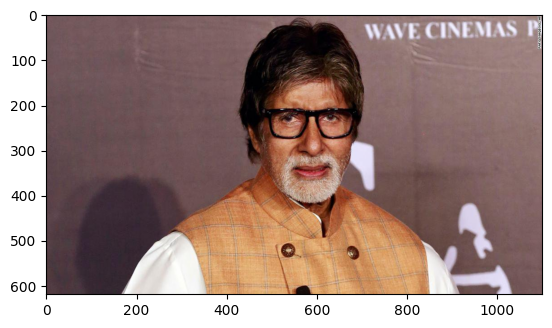

1/1 [==============================] - 0s 269ms/step
[{'box': [467, 119, 208, 289], 'confidence': 0.9999887347221375, 'keypoints': {'left_eye': (538, 233), 'right_eye': (633, 230), 'nose': (598, 288), 'mouth_left': (544, 337), 'mouth_right': (627, 333)}}]
Detected Face in the image : 


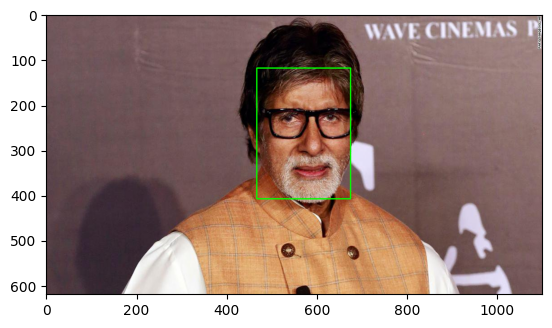

1/1 [==============================] - 0s 184ms/step
Extracted Face is : 


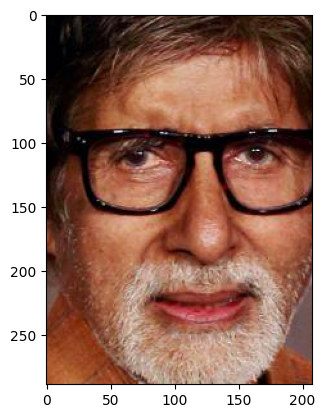

1/1 [==============================] - 0s 202ms/step
The Actor is  Amitabh_Bachchan

In [34]:
prediction("/content/Bollywood Actor Images/Bollywood Actor Images/amitabh_bachchan/01be2dc1ce.jpg")

The provided image is


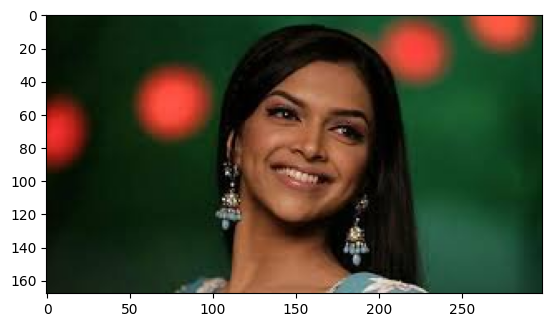

1/1 [==============================] - 0s 255ms/step
[{'box': [120, 24, 75, 99], 'confidence': 0.9999998807907104, 'keypoints': {'left_eye': (145, 60), 'right_eye': (180, 70), 'nose': (159, 82), 'mouth_left': (135, 91), 'mouth_right': (172, 100)}}]
Detected Face in the image : 


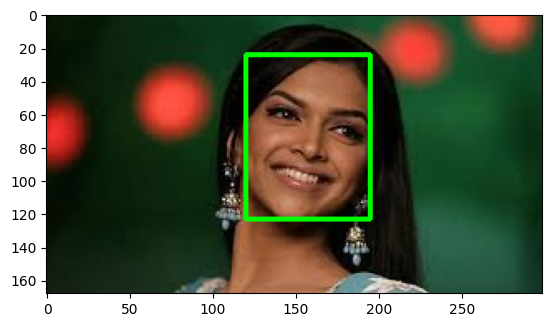

1/1 [==============================] - 0s 167ms/step
Extracted Face is : 


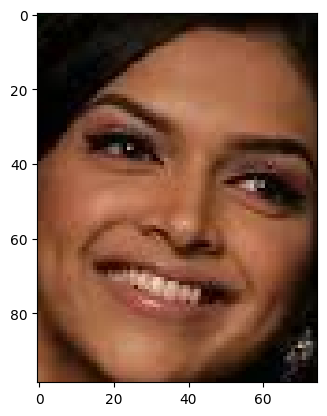

1/1 [==============================] - 0s 216ms/step
The Actor is  Deepika_Padukone

In [38]:
prediction("/content/Bollywood Actor Images/Bollywood Actor Images/deepika_padukone/00b208121e.jpg")

The provided image is


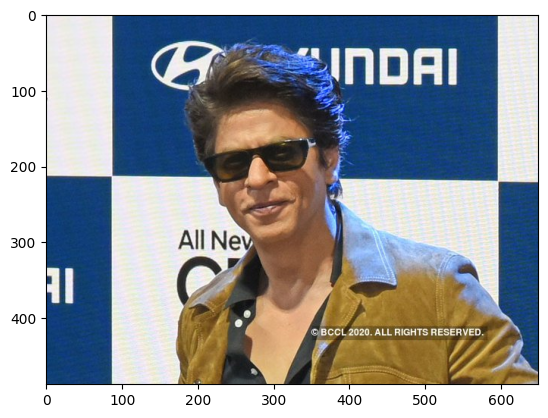

1/1 [==============================] - 1s 784ms/step
[{'box': [214, 117, 150, 181], 'confidence': 0.9999870657920837, 'keypoints': {'left_eye': (247, 194), 'right_eye': (312, 182), 'nose': (278, 221), 'mouth_left': (263, 259), 'mouth_right': (320, 247)}}, {'box': [349, 116, 42, 54], 'confidence': 0.7110274434089661, 'keypoints': {'left_eye': (372, 135), 'right_eye': (388, 135), 'nose': (387, 147), 'mouth_left': (372, 159), 'mouth_right': (385, 160)}}]
Detected Face in the image : 


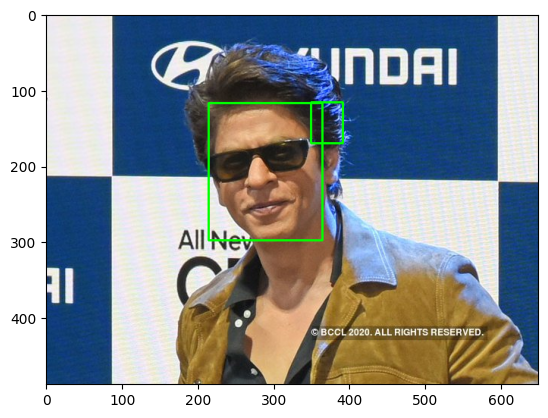

1/1 [==============================] - 0s 432ms/step
Extracted Face is : 


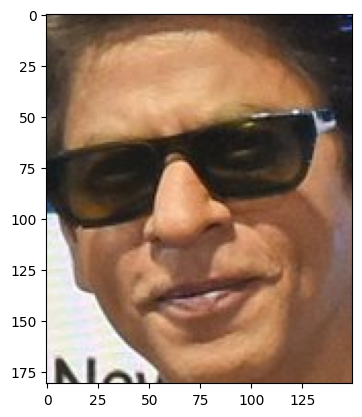

1/1 [==============================] - 0s 400ms/step
The Actor is  Shah_Rukh_Khan

In [24]:
prediction("/content/Bollywood Actor Images/Bollywood Actor Images/shah_rukh_khan/6881dc55a5.jpg")